<a href="https://colab.research.google.com/github/2303A51046/AIML-2025_B/blob/main/Lab-Exam-1046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

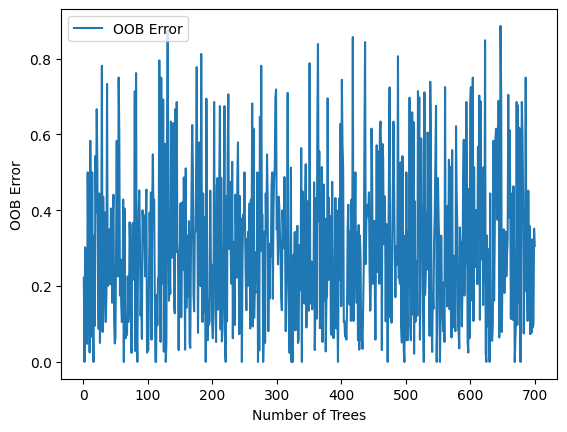

Random Forest Accuracy: 0.75
Decision Tree Accuracy: 0.7033333333333334
Random Forest F1-Score: 0.46808510638297873
Top Features: Index(['amount', 'age', 'months_loan_duration', 'checking_balance',
       'credit_history'],
      dtype='object')
Confusion Matrix:
[[192  17]
 [ 58  33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       209
           1       0.66      0.36      0.47        91

    accuracy                           0.75       300
   macro avg       0.71      0.64      0.65       300
weighted avg       0.74      0.75      0.72       300



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('credit.csv')
data_encoded = data.copy()
for col in data.select_dtypes(include='object').columns:
    data_encoded[col] = LabelEncoder().fit_transform(data[col])

X = data_encoded.drop('default', axis=1)
y = data_encoded['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = X.columns[sorted_idx]

plt.plot(range(1, len(rf_model.oob_decision_function_) + 1), rf_model.oob_decision_function_[:, 1], label="OOB Error")
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.legend()
plt.show()

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_acc}")
print(f"Decision Tree Accuracy: {dt_acc}")
print(f"Random Forest F1-Score: {rf_f1}")
print(f"Top Features: {top_features[:5]}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{class_report_rf}")
